# Part II - FordGo Bike Sharing Data Analysis
## by Abdur-Roqeeb Ismail

## Investigation Overview

In this investigation, I wanted to check for features that can be used to predict where and when most trips occured. I also want to know how characteristics of users (gender, age group and user type) affect the duration of the trips.                                                                              

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset contained 16 columns and 183412 rows. I perfomed a preliminary wrangking on the data and the shape of the data became 24 columns and 174952 after data cleaning and feature engineering.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv('bike_modified.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
days_ordered = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

days = pd.api.types.CategoricalDtype(ordered=True, categories=days_ordered)

bike.start_day = bike.start_day.astype(days)
bike.end_day = bike.end_day.astype(days)

In [4]:
age_groups = ['10-20','20-30','30-40','40-50','50-60', '60-70','70-80']

ordered_age_groups = pd.api.types.CategoricalDtype(ordered=True, categories=age_groups)

bike.age_group = bike.age_group.astype(ordered_age_groups)

In [5]:
# set plotting style
sb.set_theme(style = 'darkgrid')
base_color = sb.color_palette()[0]

## Distribution of trips by days of the week.

The number of trips during the days of the week are generally more than those that occured during the weekend. Thursday is the day with the highest number of trips while Sunday is the day with the lowest

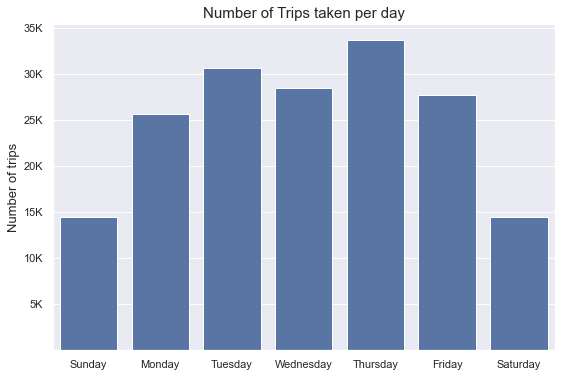

In [6]:
plt.figure(figsize=[9,6])
sb.countplot(data=bike, x='start_day', color=base_color)
plt.yticks([5000, 10000, 15000, 20000, 25000, 30000, 35000],['5K', '10K', '15K', '20K', '25K', '30K','35K'])
plt.xlabel(' ')
plt.ylabel('Number of trips', fontsize=13)
plt.title('Number of Trips taken per day', fontsize=15);

## Distribution of Member Gender

A large proportion of the bike users are male.

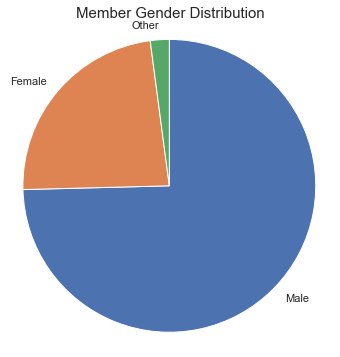

In [7]:
sorted_counts = bike.member_gender.value_counts()
plt.figure(figsize=[6,6])
plt.pie(sorted_counts, labels=sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square')
plt.title('Member Gender Distribution', fontsize=15);

## Top 10 start and end stations.

The station at Market Street at 10th Street was the station where most trips started from , while most trips ended at San Francisco Caltrain Station 2. Most of the stations where most trips occured are around Market Street.

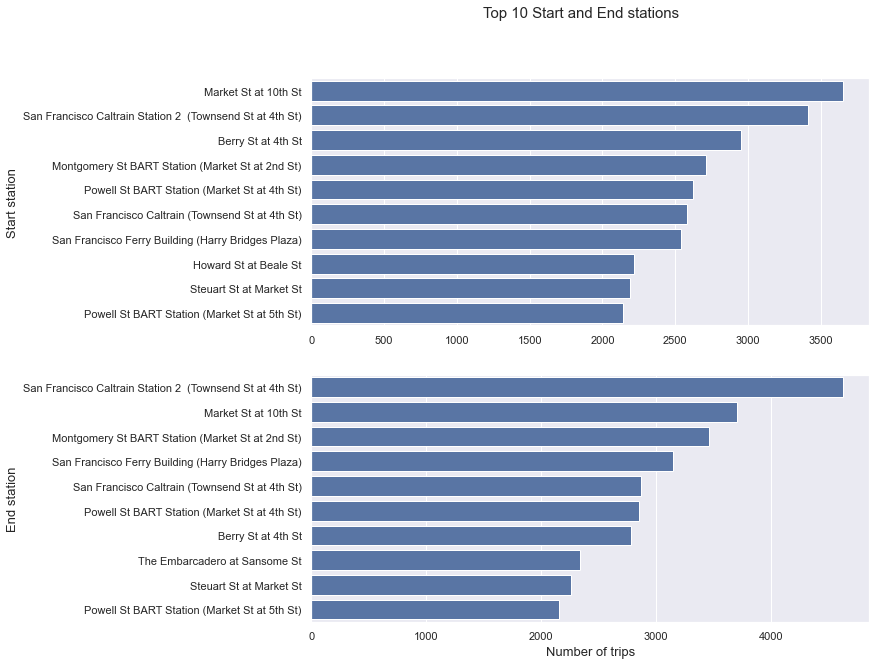

In [8]:
# Filter top 10 used start and end stations
start_filter = bike.start_station_name.value_counts().head(10)
end_filter = bike.end_station_name.value_counts().head(10)

# Create dataframe of most used stations
top_start = bike[bike.start_station_name.isin(start_filter.index)]
top_end = bike[bike.end_station_name.isin(end_filter.index)]

plt.figure(figsize=(10,10))
plt.suptitle('Top 10 Start and End stations', fontsize=15 );

plt.subplot(2,1,1)
sb.countplot(data=top_start, y='start_station_name', color=base_color, order= start_filter.index);
plt.ylabel('Start station', fontsize=13)
plt.xlabel(' ')

plt.subplot(2,1,2)
sb.countplot(data=top_end, y='end_station_name', color=base_color, order= end_filter.index);
plt.ylabel('End station', fontsize=13)
plt.xlabel('Number of trips', fontsize=13);

## Effect of user type on Average Duration of trips.
The trips take by customers lasted longer on an average than those by subscribers. Infact average duration of trips by customers is twice as long as that by subscribers.

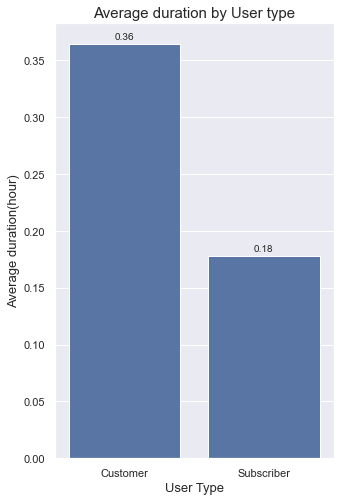

In [9]:
plt.figure(figsize=[5,8])
g = sb.barplot(data=bike, x='user_type', y='duration_hour', ci=None, color=base_color)
plt.title('Average duration by User type', fontsize=15);
plt.xlabel('User Type', fontsize=13);
plt.ylabel('Average duration(hour)', fontsize=13);

for bar in g.patches:
    g.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 7),
                   textcoords='offset points');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [10]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_FordGo_Bike_Sharing_Data_Analysis_Report.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook FordGo_Bike_Sharing_Data_Analysis_Report_PartII.ipynb to slides
[NbConvertApp] Writing 746090 bytes to FordGo_Bike_Sharing_Data_Analysis_Report_PartII.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Owner\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Owner\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Owner\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\Owner\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Owner\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
  